# Feature scaling

It is a preprocessing step that involves transforming the features of your dataset to a similar scale. This can help improve the performance of neural networks (and other machine learning algorithms) in several ways:


* **Improves convergence**: Feature scaling can help gradient descent converge more quickly during training. When features are on different scales, the optimization algorithm may take longer to reach the minimum of the loss function because the steps in the direction of the gradient are not consistent across features.

* **Prevents dominance of certain features**: If one feature has a much larger scale than others, it can dominate the learning process and make it difficult for the model to learn from other features effectively. Scaling the features ensures that each feature contributes proportionally to the learning process.

* **Facilitates regularization**: Regularization techniques, such as L1 or L2 regularization, penalize large weights in the model. Features with larger scales may lead to larger weights, which are more likely to be penalized. Scaling the features can mitigate this issue and improve the effectiveness of regularization.

* **Makes algorithms less sensitive to outliers**: Scaling can reduce the impact of outliers on the model because it shrinks the range of the features. Outliers may have a disproportionately large effect on models when features are on different scales, but scaling can make the algorithm more robust to outliers.

* **Improves interpretability**: Scaling the features can make the coefficients or weights learned by the model more interpretable. Without scaling, the coefficients may not accurately reflect the importance of each feature in the prediction process.

### Common methods for feature scaling include:

* **Standardization (Z-score normalization)**: Scaling features to have a mean of 0 and a standard deviation of 1. (used when you're data is approximately normally distributed)
* **Min-max scaling**: Scaling features to a fixed range, typically [0, 1] or [-1, 1]. (used when you know minimum and maximum value of your data)
* **Robust scaling**: Scaling features based on percentiles to make them robust to outliers. (used when your datset has outliers, skewed distributions, or sensitive algorithms)

Let's implement it practically. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


In [2]:
data = pd.read_csv("/kaggle/input/mushroom-dataset/mushroom_cleaned.csv")

In [3]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [5]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [9]:
inputs = data.iloc[:,0:8]
target = data.iloc[:, -1]

In [10]:
inputs

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [6]:
from sklearn.model_selection import train_test_split

In [11]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2024-04-19 05:07:33.340509: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 05:07:33.340636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 05:07:33.495973: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
print("train_inputs: ", train_inputs.shape)
print("test_inputs: ", test_inputs.shape)
print("train_output: ", train_target.shape)
print("test_output:", test_target.shape)

train_inputs:  (43228, 8)
test_inputs:  (10807, 8)
train_output:  (43228,)
test_output: (10807,)


In [16]:
model = Sequential()

model.add(Dense(128, activation = "relu", input_dim = 8))
model.add(Dense(1, activation = "sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [20]:
history = model.fit(train_inputs, train_target, validation_split = 0.2, epochs = 200)

Epoch 1/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5585 - loss: 3.2700 - val_accuracy: 0.6175 - val_loss: 0.7118
Epoch 2/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5940 - loss: 1.1494 - val_accuracy: 0.5508 - val_loss: 2.4886
Epoch 3/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5990 - loss: 1.1377 - val_accuracy: 0.5382 - val_loss: 2.5075
Epoch 4/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5978 - loss: 1.2999 - val_accuracy: 0.5524 - val_loss: 1.8367
Epoch 5/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6109 - loss: 1.1602 - val_accuracy: 0.6493 - val_loss: 0.6306
Epoch 6/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6254 - loss: 0.9975 - val_accuracy: 0.5549 - val_loss: 2.0917
Epoch 7/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6235 - loss: 1.1556 - val_accuracy: 0.6583 - val_loss: 0.8730
Epoch 8/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6366 - loss: 0

In [21]:
import matplotlib.pyplot as plt

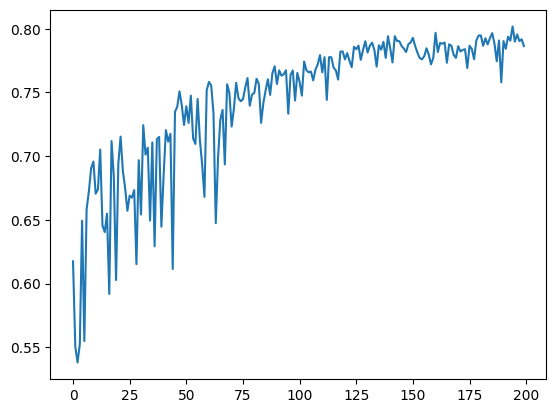

In [22]:
plt.plot(history.history['val_accuracy'])

## Applying Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

scaled_train_inputs = scaler.fit_transform(train_inputs)
scaled_test_inputs = scaler.transform(test_inputs)

In [25]:
scaled_train_inputs

array([[-0.90319838,  0.92730337, -0.95948901, ..., -1.04000676,
        -0.74211062, -0.20633721],
       [ 0.09241927,  0.4648552 , -0.51076625, ..., -0.44502927,
         0.79082058, -0.02654537],
       [ 0.88558543, -0.92248933, -0.95948901, ...,  0.57000744,
         0.79082058, -0.02654537],
       ...,
       [-1.33028785, -1.84738568, -0.95948901, ..., -1.237907  ,
        -0.74211062, -0.20633721],
       [ 1.96440233, -0.92248933, -0.95948901, ...,  0.87132651,
         0.79082058, -0.02654537],
       [ 0.54724182, -0.92248933,  1.2841248 , ...,  0.21634056,
        -0.43552438, -0.02654537]])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights=False
)

In [28]:
history = model.fit(scaled_train_inputs,train_target,validation_split = 0.2,epochs=200, callbacks = callback)

Epoch 1/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6139 - loss: 3.0488 - val_accuracy: 0.6970 - val_loss: 0.6422
Epoch 2/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7125 - loss: 0.6053 - val_accuracy: 0.7474 - val_loss: 0.5279
Epoch 3/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7576 - loss: 0.5085 - val_accuracy: 0.7630 - val_loss: 0.4866
Epoch 4/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7810 - loss: 0.4647 - val_accuracy: 0.7866 - val_loss: 0.4506
Epoch 5/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8018 - loss: 0.4306 - val_accuracy: 0.8200 - val_loss: 0.4051
Epoch 6/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8198 - loss: 0.4005 - val_accuracy: 0.8213 - val_loss: 0.3878
Epoch 7/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8260 - loss: 0.3818 - val_accuracy: 0.8417 - val_loss: 0.3642
Epoch 8/200
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8378 - loss: 0

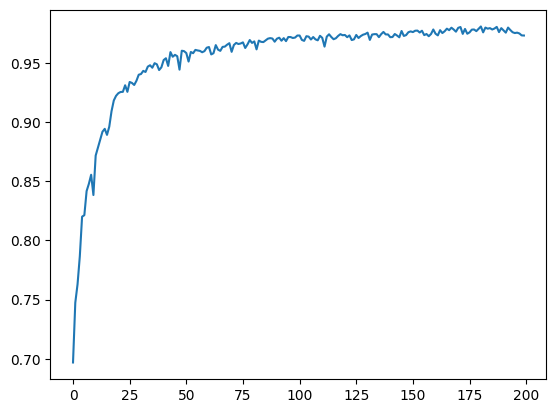

In [29]:
plt.plot(history.history['val_accuracy']) 

It is evident that, the accuracy increases after feature scaling. It helps improve the performance of neural networks by promoting faster convergence, preventing dominance of certain features, facilitating regularization, making algorithms less sensitive to outliers, and improving interpretability. 

It's an essential preprocessing step in many machine learning tasks.

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.
